<a href="https://colab.research.google.com/github/shanojpillai/GenerativeAI_100Days/blob/main/Day_5__DiffusionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified


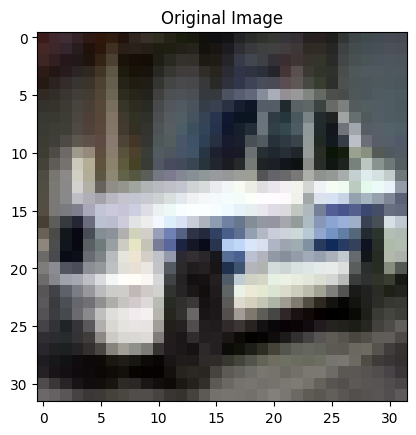

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.utils as vutils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Load sample image from CIFAR-10 for demonstration
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

# Get one image from the dataset
data_iter = iter(loader)
# Use next(data_iter) instead of data_iter.next()
images, _ = next(data_iter)
plt.imshow(images[0].permute(1, 2, 0))
plt.title("Original Image")
plt.show()

Files already downloaded and verified


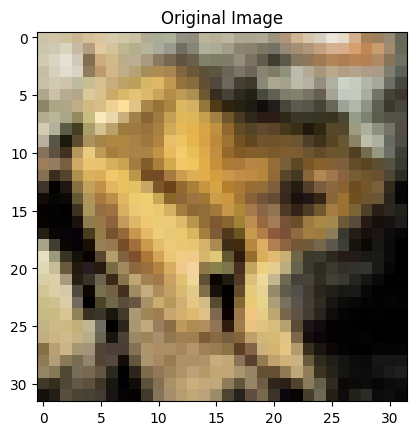

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.utils as vutils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Load sample image from CIFAR-10 for demonstration
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

# Get one image from the dataset
data_iter = iter(loader)
images, _ = next(data_iter)  # Use next(data_iter) instead of data_iter.next()
plt.imshow(images[0].permute(1, 2, 0))
plt.title("Original Image")
plt.show()


Files already downloaded and verified


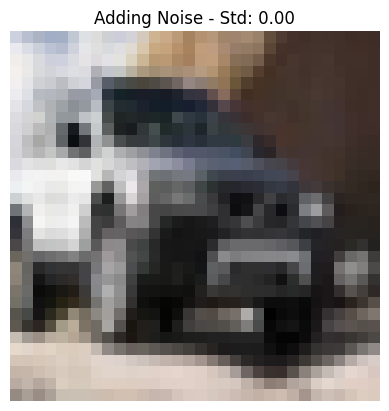

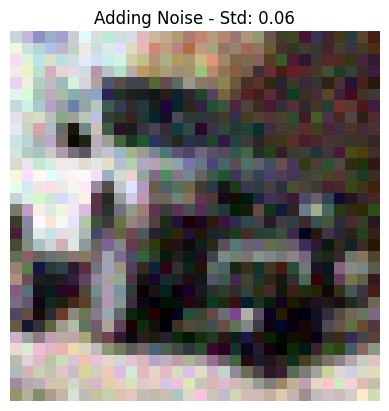

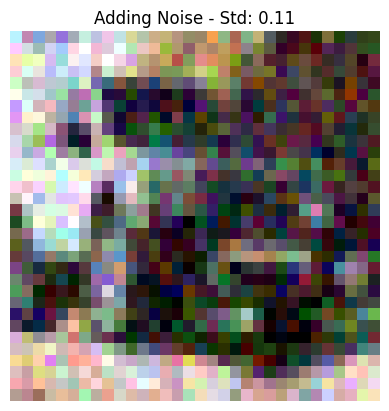

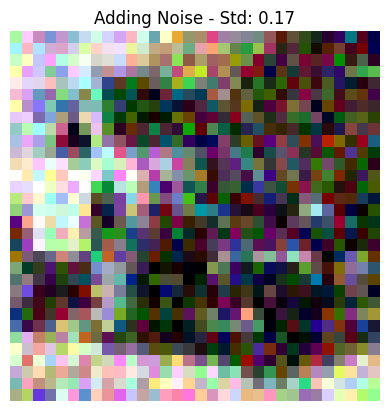

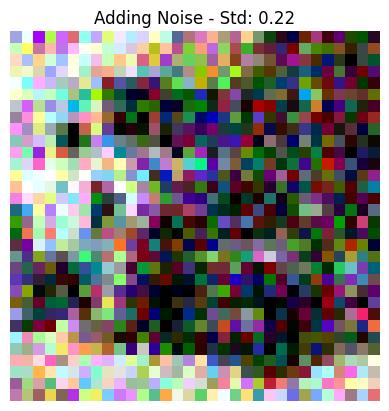

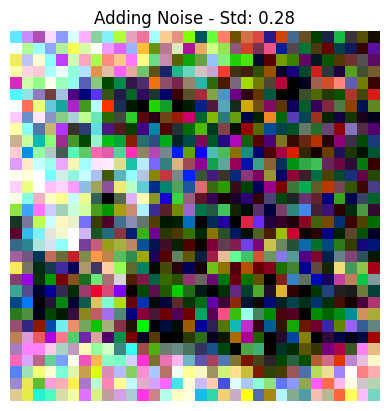

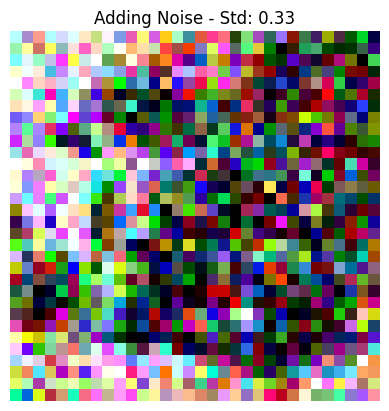

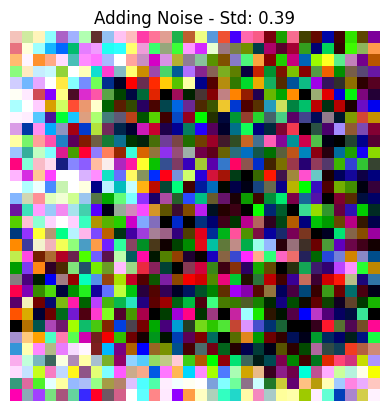

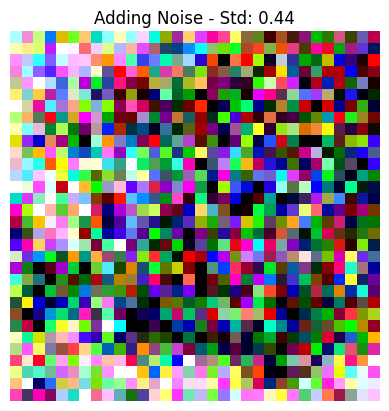

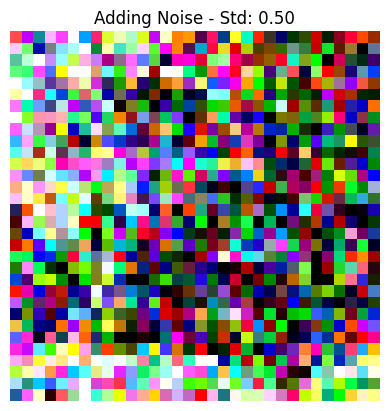

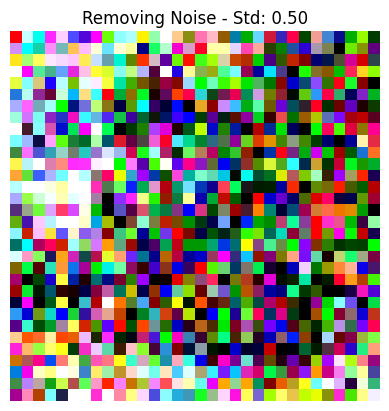

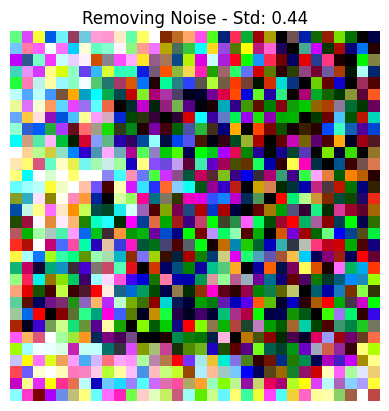

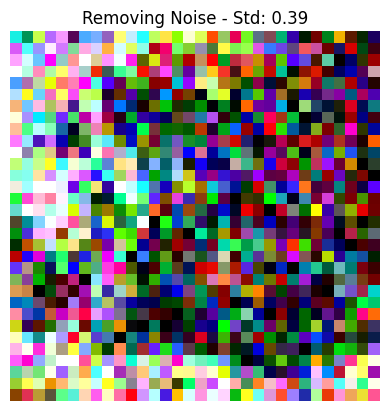

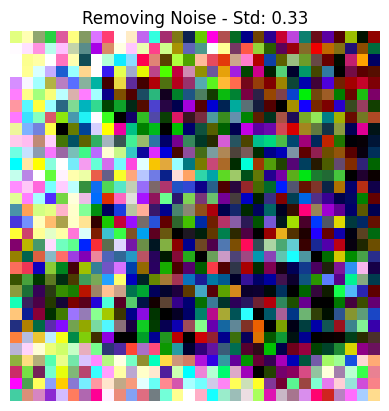

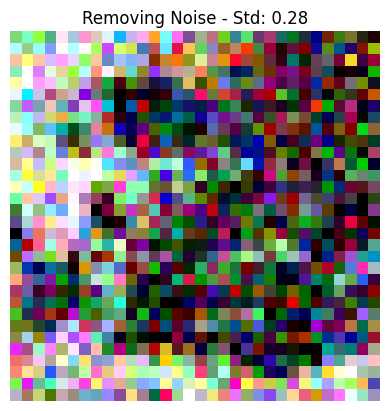

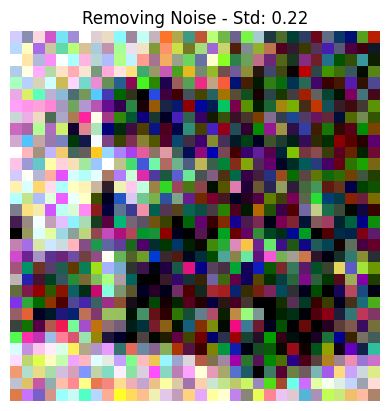

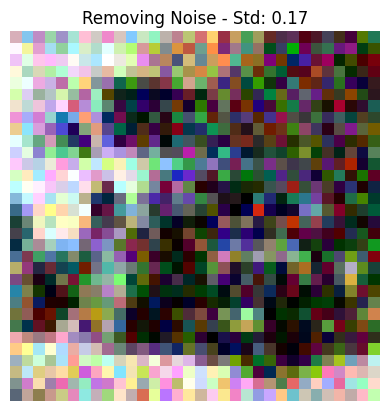

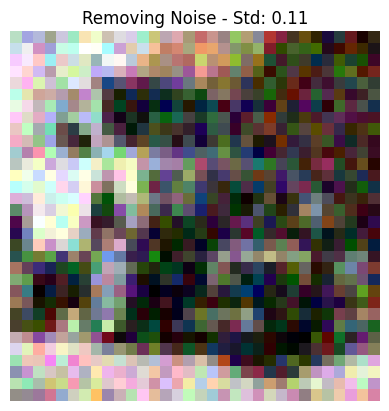

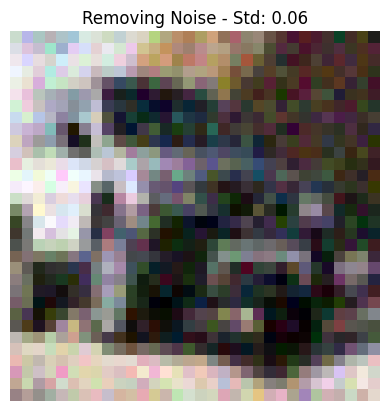

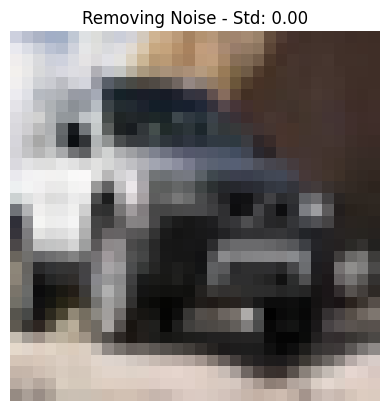

In [5]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import time

# Load sample image from CIFAR-10 for demonstration
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

# Get one image from the dataset
data_iter = iter(loader)
images, _ = next(data_iter)
original_image = images[0]

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, std):
    noisy_image = image + torch.randn_like(image) * std
    return torch.clamp(noisy_image, 0., 1.)

# Display function to visualize the image with noise
def display_image(image, title):
    plt.imshow(image.permute(1, 2, 0).cpu().numpy())
    plt.title(title)
    plt.axis('off')
    plt.show()

# Gradually add noise
for std in np.linspace(0, 0.5, 10):  # Increase noise in 10 steps
    noisy_image = add_gaussian_noise(original_image, std)
    display_image(noisy_image, f"Adding Noise - Std: {std:.2f}")
    time.sleep(0.5)  # Delay for visualization

# Gradually remove noise (reverting back)
for std in np.linspace(0.5, 0, 10):  # Decrease noise in 10 steps
    noisy_image = add_gaussian_noise(original_image, std)
    display_image(noisy_image, f"Removing Noise - Std: {std:.2f}")
    time.sleep(0.5)  # Delay for visualization
